# RIcordarsi ti togliere i test di calico prima di committare

In [11]:
# Imports: 
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# File names to read

baremetal_array_fn: str = "./baremetal-no-ssl_arrays.csv"
baremetal_dataf_fn: str = "./baremetal-no-ssl_dataframes.csv"
# kube_array_fn: str = "./kube_arrays.csv"
# kube_dataf_fn: str = "./kube_dataframes.csv"
kube_array_fn: str = "./kube-thin_arrays.csv"
kube_dataf_fn: str = "./kube-thin_dataframes.csv"

kube_array_fn: str = "./kube-thin-lasttest_arrays.csv"
kube_dataf_fn: str = "./kube-thin-lasttest_dataframes.csv"

## Arrays case

In [33]:
baremetal = pd.read_csv(baremetal_array_fn)
kube      = pd.read_csv(kube_array_fn)

In [34]:
# See all the performed benchmark on dask arrays
functions = kube['name'].unique()
functions

array(['block-wise operation', 'create random 2D-array',
       'elementwise computation', 'random access',
       'reduction (std) along axis', 'reduction operation (std)',
       'sum the transpose'], dtype=object)

In [35]:
def plot_rate(
    baremetal = baremetal, 
    kube = kube, 
    function = "",
    ideal_case = True,
    y_quantity = "rate_mean"
):
    # Extract the needed data: 
    kube = kube[kube["name"] == function].copy()
    baremetal = baremetal[baremetal["name"] == function].copy()
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(baremetal['n'], baremetal[y_quantity], label = "bare-metal", marker="o")
    plt.plot(kube['n'], kube[y_quantity], label = "kubernetes", marker="^")

    if ideal_case:
        plt.plot(baremetal['n'], baremetal[y_quantity].iloc[0] * baremetal['n'] / baremetal['n'].iloc[0], label = "Ideal case", linestyle = "--")
        
    plt.xlabel('Number of cores')
    plt.ylabel('Rate (Mb/s)')
    plt.title(f'{function} rate')
    plt.legend()
    
    plt.show()

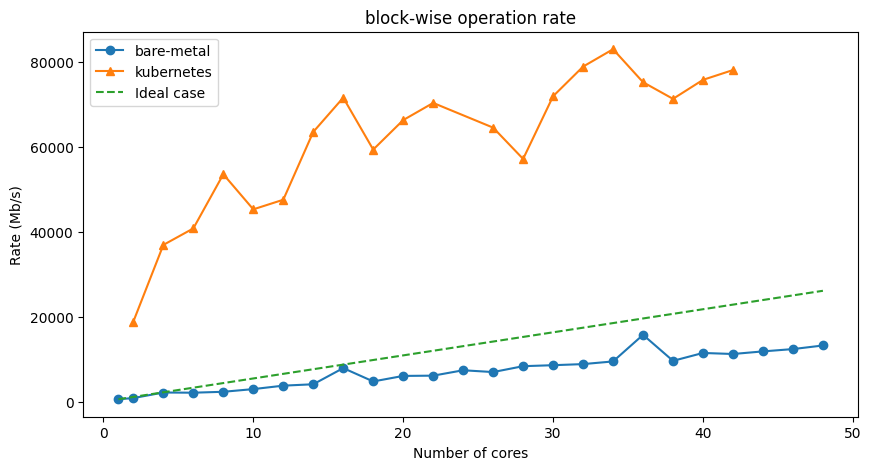

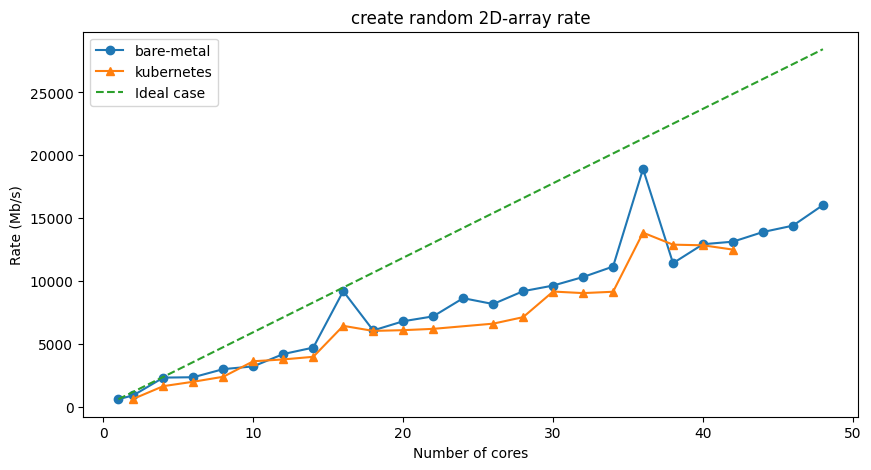

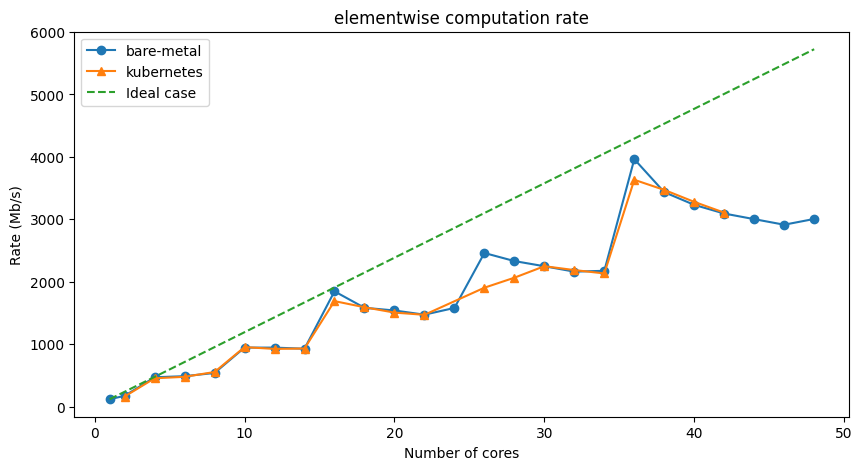

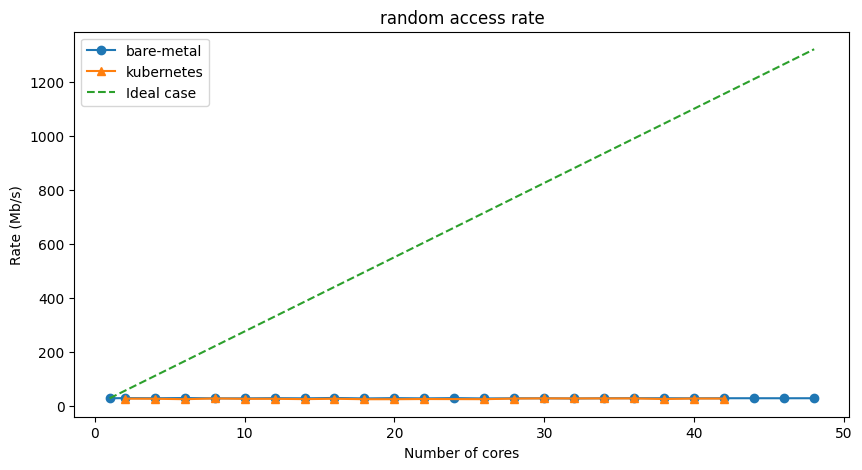

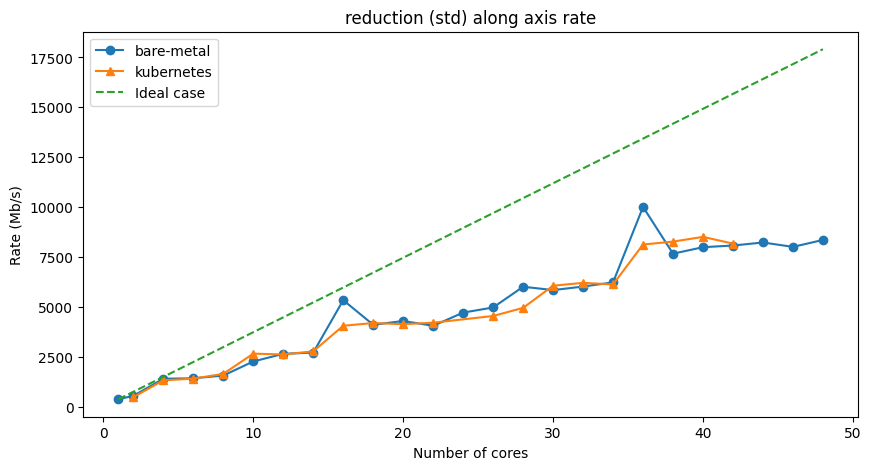

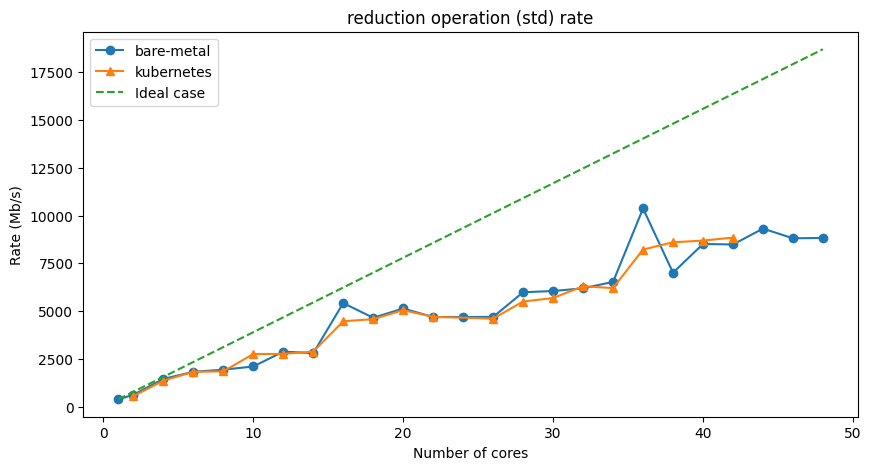

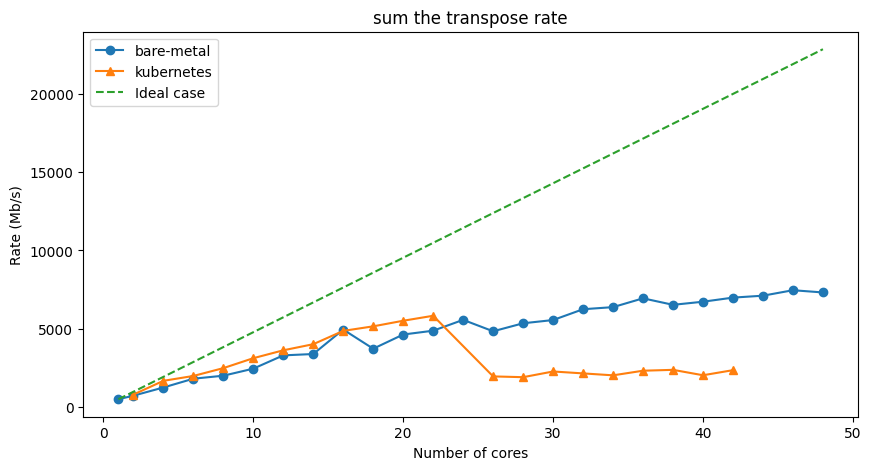

In [36]:
for f in functions:
    plot_rate(function=f)

## Dataframe case

In [37]:
baremetal = pd.read_csv(baremetal_dataf_fn)
kube      = pd.read_csv(kube_dataf_fn)

In [38]:
# See all the performed benchmark on dask arrays
functions = kube['name'].unique()
functions 

array(['block-wise operation', 'create random dataframe',
       'group-by apply operation', 'group-by operation',
       'group-by operation (2 columns)', 'order data', 'random access',
       'reduction operation (std)', 'series reduction operation (std)'],
      dtype=object)

In [39]:
def plot_rate_df(
    baremetal = baremetal, 
    kube = kube, 
    function = "",
    ideal_case = True,
    y_quantity = "rate_mean"
):
    # Extract the needed data: 
    kube = kube[kube["name"] == function].copy()
    baremetal = baremetal[baremetal["name"] == function].copy()
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(baremetal['n'], baremetal[y_quantity], label = "bare-metal", marker="o")
    plt.plot(kube['n'], kube[y_quantity], label = "kubernetes", marker="^")

    if ideal_case:
        # plt.plot(baremetal['n'], baremetal[y_quantity].iloc[0] * baremetal['n'] / baremetal['n'].iloc[0], label = "Ideal case", linestyle = "--")
        plt.plot(kube['n'], kube[y_quantity].iloc[0] * kube['n'] / kube['n'].iloc[0], label = "Ideal case", linestyle = "--")

    plt.xlabel('Number of cores')
    plt.ylabel('Rate (Mb/s)')
    plt.title(f'{function} rate')
    plt.legend()
    
    plt.show()

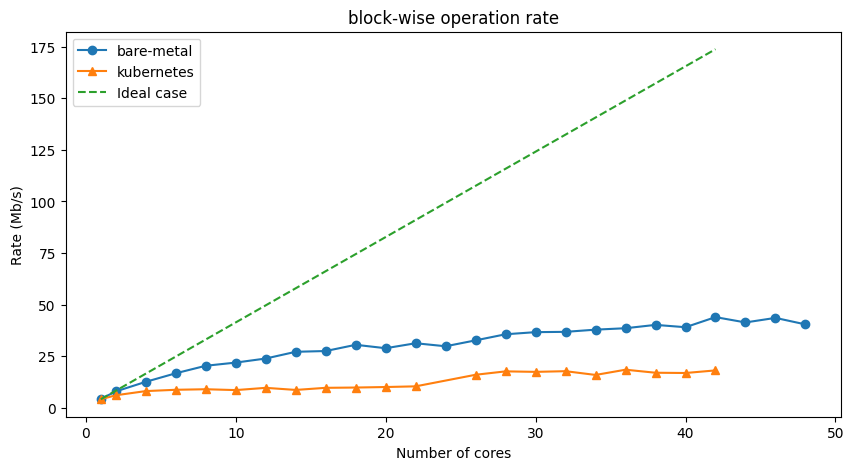

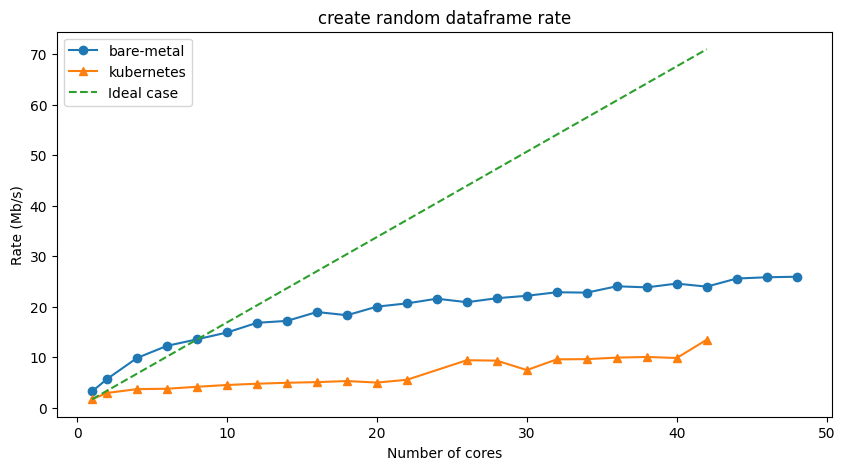

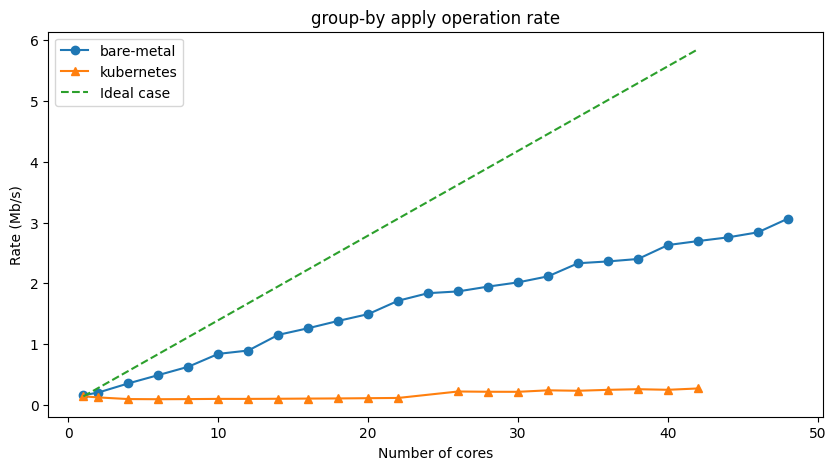

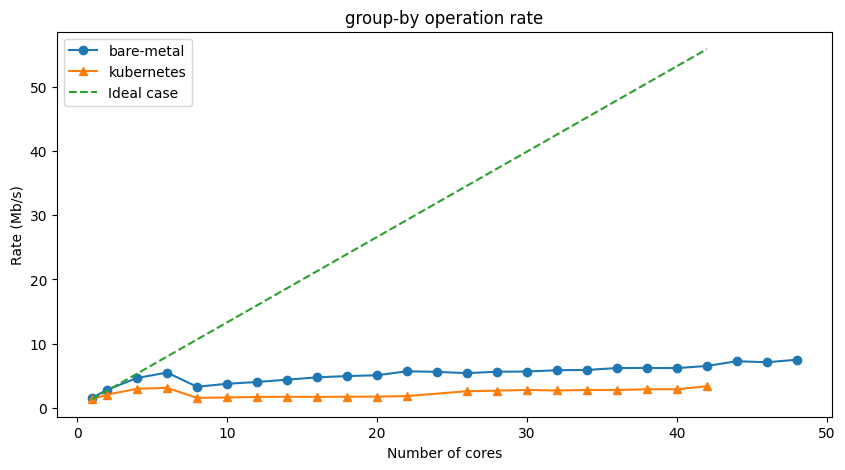

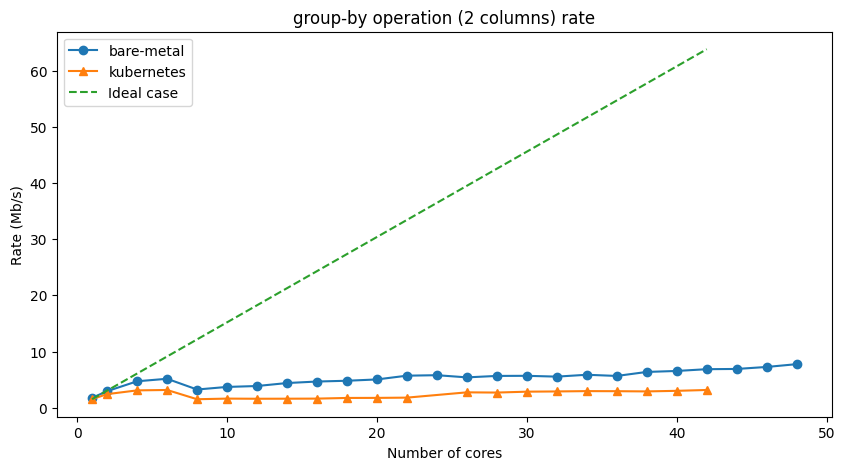

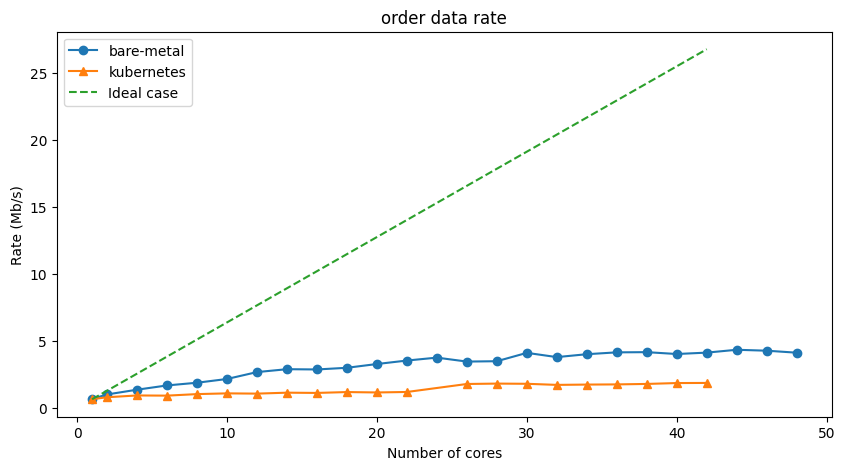

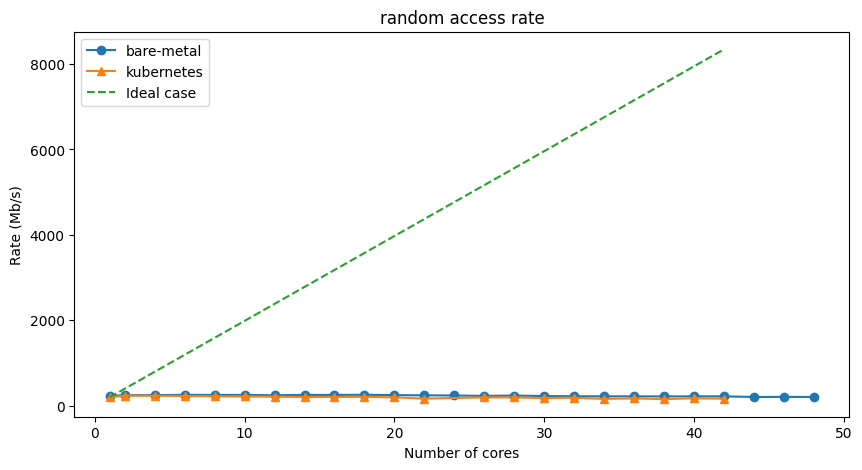

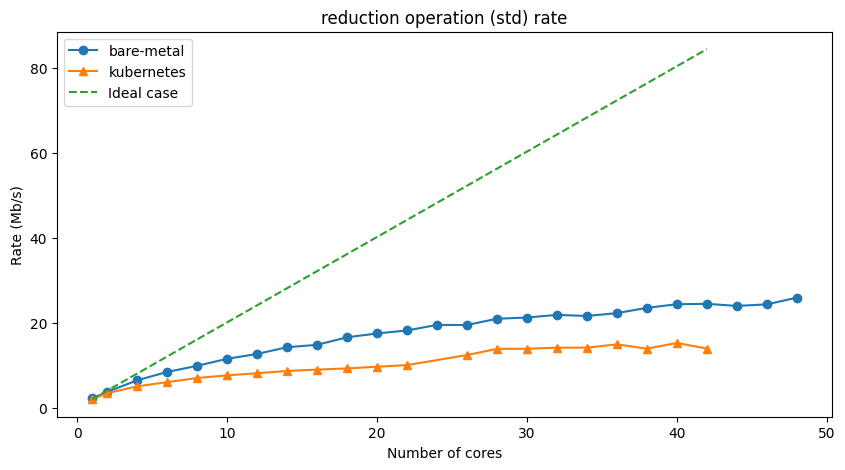

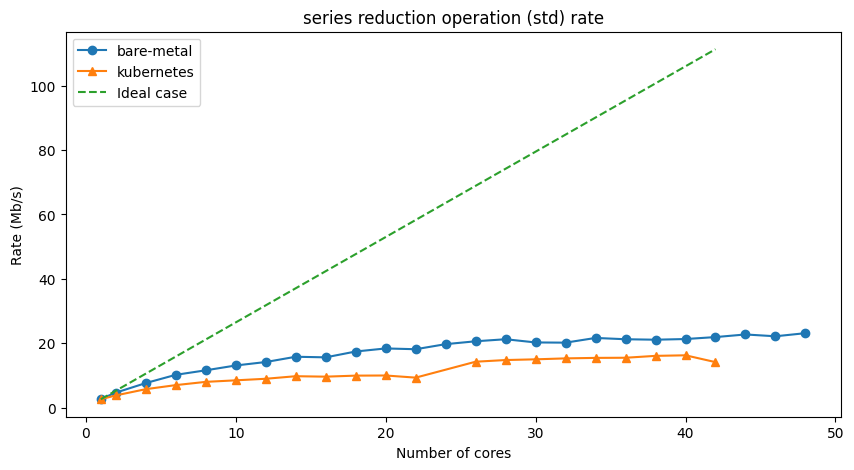

In [40]:
for f in functions:
    plot_rate_df(function=f)